<a href="https://colab.research.google.com/github/jkworldchampion/Todays_Menu/blob/main/apply_image_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())  # GPU

2.8.2
/device:GPU:0


In [2]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz  # https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/에 있는 download를 wget으로 가져온다.

--2022-06-06 09:09:13--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2022-06-06 09:09:13--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  25.2MB/s    in 3m 25s  

2022-06-06 09:12:39 (23.2 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [3]:
!tar xzvf food-101.tar.gz  # tar명령어로 압축풀기 수행

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food

In [4]:
!ls food-101

images	license_agreement.txt  meta  README.txt


In [5]:
os.listdir('food-101/images')  # food-101/images에 있는 파일과 디렉토리를 출력한다. -> 음식 종류

['caesar_salad',
 'hot_dog',
 'gyoza',
 'hummus',
 'baklava',
 'tacos',
 'spaghetti_carbonara',
 'omelette',
 'tiramisu',
 'beef_carpaccio',
 'cheese_plate',
 'chicken_curry',
 'strawberry_shortcake',
 'filet_mignon',
 'frozen_yogurt',
 'pad_thai',
 'chicken_quesadilla',
 'grilled_cheese_sandwich',
 'beef_tartare',
 'steak',
 'sashimi',
 'greek_salad',
 'baby_back_ribs',
 'shrimp_and_grits',
 'bread_pudding',
 'eggs_benedict',
 'creme_brulee',
 'sushi',
 'fried_rice',
 'ice_cream',
 'dumplings',
 'club_sandwich',
 'tuna_tartare',
 'pho',
 'ceviche',
 'donuts',
 'hamburger',
 'lobster_roll_sandwich',
 'caprese_salad',
 'guacamole',
 'pulled_pork_sandwich',
 'onion_rings',
 'lobster_bisque',
 'chicken_wings',
 'carrot_cake',
 'oysters',
 'fried_calamari',
 'miso_soup',
 'macaroni_and_cheese',
 'prime_rib',
 'macarons',
 'french_toast',
 'chocolate_cake',
 'mussels',
 'deviled_eggs',
 'foie_gras',
 'paella',
 'edamame',
 'beignets',
 'crab_cakes',
 'spring_rolls',
 'falafel',
 'bruschetta

In [6]:
os.listdir('food-101/meta') 

['labels.txt',
 'train.json',
 'classes.txt',
 'train.txt',
 'test.txt',
 'test.json']

In [7]:
!head food-101/meta/train.txt  # 맨위의 몇개를 살펴본다.

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [8]:
!head food-101/meta/classes.txt  # 음식 클래스들이 뭐가 있는지 슬쩍 본다.

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


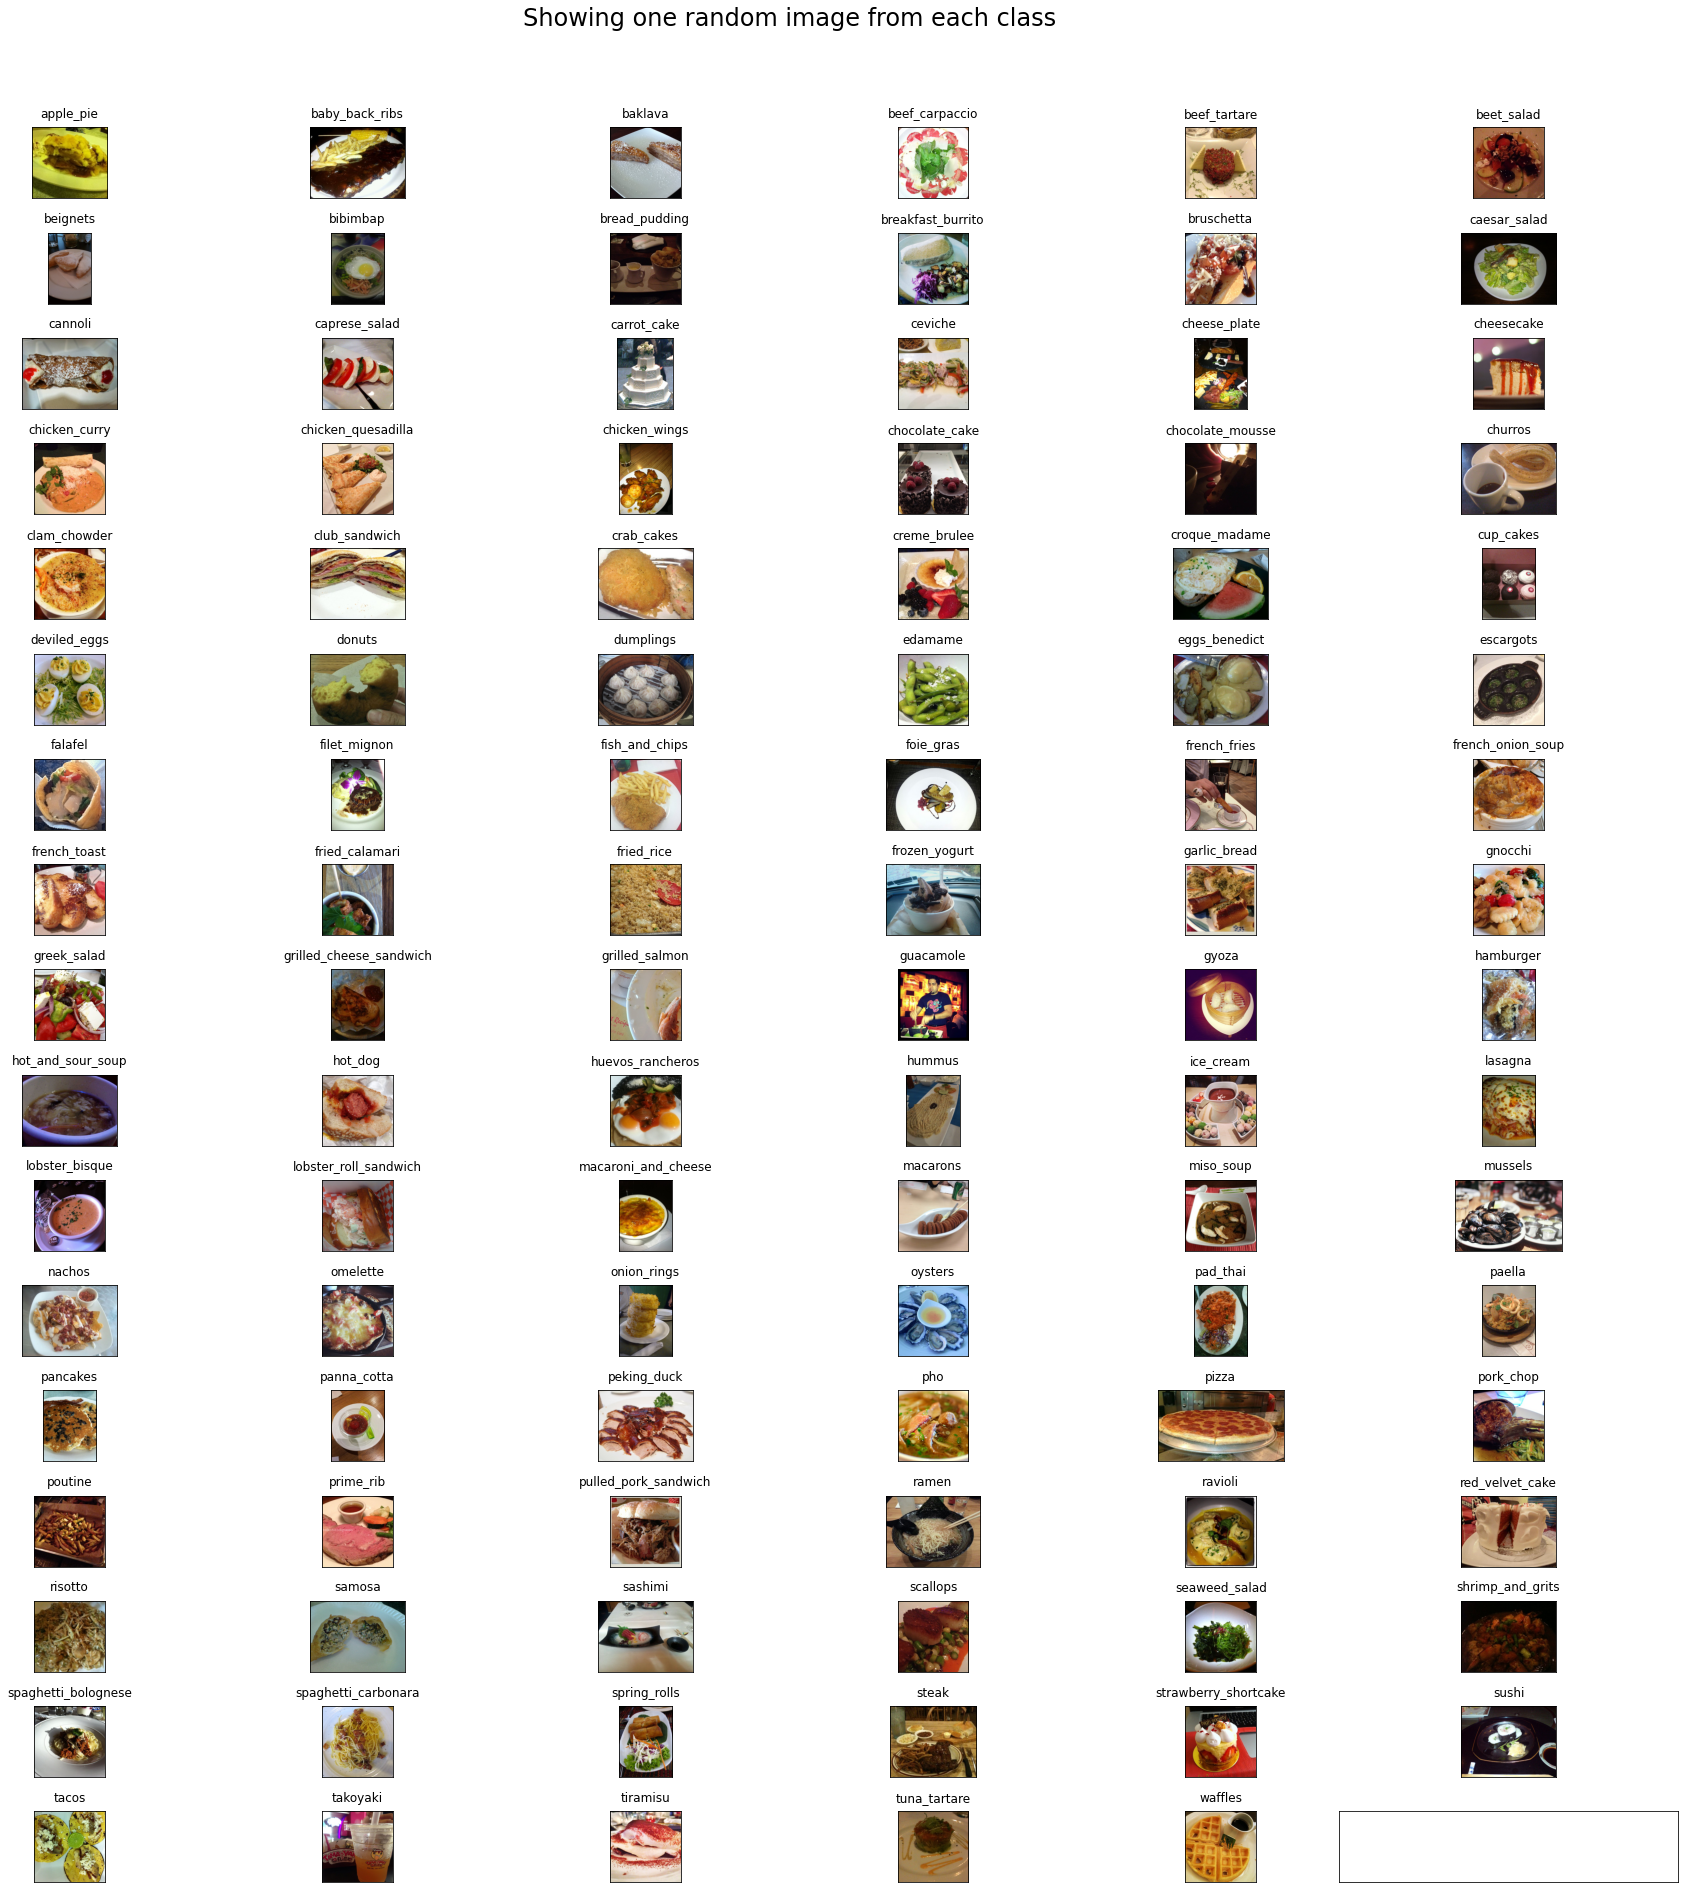

In [9]:
# 데이터 시각화, 101 클래스에 있는 음식별로 이미지 하나씩 본다. -> 이미지 101개 (17*6)-1
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))  # 한 화면에 여러개가 보일 수 있도록 서브플롯을 만듦
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))  # os.listdir()의 반환 형태는 리스트
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':  # 아마 파일의 끝을 의미하는 듯. 메타데이터를 담은 파일.
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html

In [10]:
# trian과 test로 나눈다.
def prepare_data(filepath, src, dest):
  classes_images = defaultdict(list)  # 값을 지정하지 않으면 해당 값의 key값이 리스트로 디폴트된다.
  with open(filepath, 'r') as txt:  # filepath의 파일을 읽기모드로 열어서 txt라고 지명한다.
      paths = [read.strip() for read in txt.readlines()] # paths는 한 줄씩 읽은 데이터를 앞뒤의 \n을 제거한 깔끔한 리스트
      for p in paths:  # 리스트에서 한줄씩 p에 할당
        food = p.split('/')  # '음식이름/번호'의 데이터를 / 로 나누기
        classes_images[food[0]].append(food[1] + '.jpg')  # classes_images리스트에 음식이름에 번호들을 저장.jpg를 붙여서

  for food in classes_images.keys():  # 음식이름이 하나씩 food에 할당
    print("\nCopying images into ",food) # 무슨 음식 하는지 출력
    if not os.path.exists(os.path.join(dest,food)):  # dest/food파일이 존재하지 않는다면
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [11]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
%cd /
print("Creating train data...")
prepare_data('/content/food-101/meta/train.txt', '/content/food-101/images', 'train')

/
Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying 

In [12]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('/content/food-101/meta/test.txt', '/content/food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [13]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' | wc -c  # 이게 뭘까... 해석이 안돼.

Total number of samples in train folder
75750


In [14]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


### Create a subset of data with few classes(3) - train_mini and test_mini for experimenting  
- We now have train and test data ready
- But to experiment and try different architectures, working on the whole data with 101 classes takes a lot of time and computation
- To proceed with further experiments, I am creating train_min and test_mini, limiting the dataset to 3 classes
- Since the original problem is multiclass classification which makes key aspects of architectural decisions different from that of binary classification, choosing 3 classes is a good start instead of 2

In [15]:
# List of all 101 types of foods(sorted alphabetically)
del foods_sorted[0] # remove .DS_Store from the list

In [16]:
foods_sorted

['baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich

In [17]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [18]:
# picking 3 food items and generating separate data folders for the same
food_list = ['apple_pie','pizza','omelette']
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'

In [19]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [20]:
print("Total number of samples in train folder")

!find train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
2250


In [21]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [22]:
print("Total number of samples in test folder")
!find test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
750


### Fine tune Inception Pretrained model using Food 101 dataset

- Keras and other Deep Learning libraries provide pretrained models
- These are deep neural networks with efficient architectures(like VGG,Inception,ResNet) that are already trained on datasets like ImageNet
- Using these pretrained models, we can use the already learned weights and add few layers on top to finetune the model to our new data
- This helps in faster convergance and saves time and computation when compared to models trained from scratch
- We currently have a subset of dataset with 3 classes - samosa, pizza and omelette
- Use the below code to finetune Inceptionv3 pretrained model

In [23]:
K.clear_session()
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_3class.hdf5')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
87924736/87910968 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
140/140 [==============================] - ETA: 0s - loss: 1.0776 - accuracy: 0.4485
Epoch 1: val_loss improved from inf to 0.86368, saving model to best_model_3class.hdf5
140/140 [==============================] - 91s 498ms/step - loss: 1.0776 - accuracy: 0.4485 - val_loss: 0.8637 - val_accuracy: 0.7065
Epoch 2/30
140/140 [==============================] - ETA: 0s - loss: 0.8509 - accuracy: 0.6714
Epoch 2: val_loss improved from 0.86368 to 0.67198, saving model to best_model_3class.hdf5
140/140 [==============================] - 67s 477ms/step - loss: 0.8509 - accuracy: 0.6714 - val_loss: 0.6720 - val_accuracy: 0.8179
Epoch 3/30
140/140 [==============================] - ETA: 0s - loss: 0.6898 - accuracy: 0.7637
Epoch 3: val_loss improved from 0.67198 to 0.54260, saving model to best_model_3class.hdf5
140/140 [==============================] - 67s 474ms/step - loss: 0.6898 - accuracy: 0.7637 - val_loss: 0.5426 - val_accuracy: 0.8614
Epoch 4/30
140/140 [=====================

In [24]:
class_map_3 = train_generator.class_indices 
class_map_3

{'apple_pie': 0, 'omelette': 1, 'pizza': 2}

### Visualize the accuracy and loss plots

In [34]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])  # acc가 아닌 accuracy로 이름이 바뀐듯
    plt.plot(history.history['val_accuracy']) # 마찮가지
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

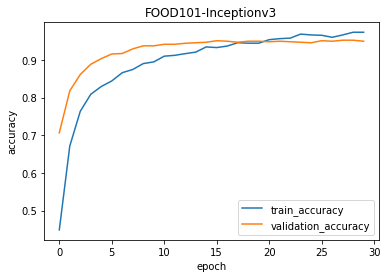

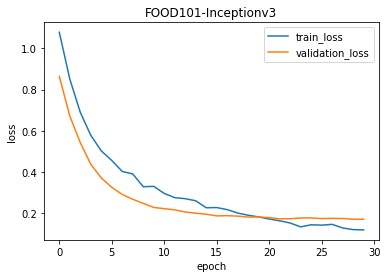

In [35]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

- The plots show that the accuracy of the model increased with epochs and the loss has decreased
- Validation accuracy has been on the higher side than training accuracy for many epochs
- This could be for several reasons:
  -  We used a pretrained model trained on ImageNet which contains data from a variety of classes
  -  Using dropout can lead to a higher validation accuracy

### Predicting classes for new images from internet using the best trained model

In [36]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

CPU times: user 2.18 s, sys: 199 ms, total: 2.38 s
Wall time: 2.35 s


- Setting compile=False and clearing the session leads to faster loading of the saved model
- Withouth the above addiitons, model loading was taking more than a minute!

In [37]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [38]:
# Downloading images from internet using the URLs
!wget -O apple_pie.jpg https://assets.epicurious.com/photos/59bc150e74febd49ca741558/1:1/w_3197,h_3197,c_limit/CINNAMON-CRUMBLE-APPLE-PIE-RECIPE-07092017.jpg
!wget -O omelette.jpg https://static.onecms.io/wp-content/uploads/sites/23/2018/05/10/golden_omelet.jpg

--2022-06-06 10:01:47--  https://assets.epicurious.com/photos/59bc150e74febd49ca741558/1:1/w_3197,h_3197,c_limit/CINNAMON-CRUMBLE-APPLE-PIE-RECIPE-07092017.jpg
Resolving assets.epicurious.com (assets.epicurious.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to assets.epicurious.com (assets.epicurious.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2167603 (2.1M) [image/jpeg]
Saving to: ‘apple_pie.jpg’

apple_pie.jpg       100%[===================>]   2.07M  --.-KB/s    in 0.06s   

2022-06-06 10:01:47 (34.4 MB/s) - ‘apple_pie.jpg’ saved [2167603/2167603]

--2022-06-06 10:01:47--  https://static.onecms.io/wp-content/uploads/sites/23/2018/05/10/golden_omelet.jpg
Resolving static.onecms.io (static.onecms.io)... 99.84.160.20, 99.84.160.98, 99.84.160.78, ...
Connecting to static.onecms.io (static.onecms.io)|99.84.160.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 889291 (868K) [image/jpeg]
Sav

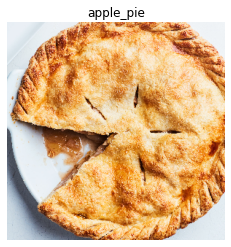

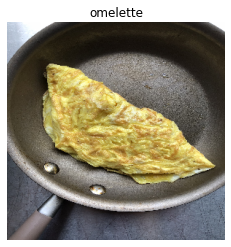

In [39]:
# Make a list of downloaded images and test the trained model
images = []
images.append('apple_pie.jpg')
images.append('omelette.jpg')

predict_class(model_best, images, True)

## Results
- In the code above, showing the capabilities of the model to detect the food in the image. This is simulating the Microwave feature of detecting how much time is needed according to the food placed inside the microwave.

- In order to achieve the desired outcome of getting the optimal food temperature from an image of a certain food placed in the microwave, there are more adjustments needed:

  - Add to the dataset the test images with their temperatures, that will give us the desired outcome.
  - Remove from the dataset any food that isn't suited for heating in the microwave.

위의 코드는 kaggle의 코드를 참고하였습니다.

한계점. 전체 음식을 모두 학습시키기에는 파라미터값이 너무 크기에 3가지 음식만 학습시켰는데, 그래도 30분 이상이 걸렸다. 그래도 마지막에 잘 적용이 됐다.